In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_train = pd.read_csv("BTC-USD.csv")
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       367 non-null    object 
 1   Open       367 non-null    float64
 2   High       367 non-null    float64
 3   Low        367 non-null    float64
 4   Close      367 non-null    float64
 5   Adj Close  367 non-null    float64
 6   Volume     367 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.2+ KB


In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-12,20628.029297,22185.031250,20448.806641,22163.949219,22163.949219,29279035521
1,2023-03-13,22156.406250,24550.837891,21918.199219,24197.533203,24197.533203,49466362688
2,2023-03-14,24201.765625,26514.716797,24081.183594,24746.074219,24746.074219,54622230164
3,2023-03-15,24770.925781,25240.615234,23964.910156,24375.960938,24375.960938,43655701450
4,2023-03-16,24373.457031,25190.326172,24225.111328,25052.789063,25052.789063,33866061747


In [4]:
train_set = dataset_train.iloc[: , 1 : 2]

In [5]:
print(train_set)

             Open
0    20628.029297
1    22156.406250
2    24201.765625
3    24770.925781
4    24373.457031
..            ...
362  66938.093750
363  68299.257813
364  68500.257813
365  69020.546875
366  72098.984375

[367 rows x 1 columns]


In [6]:
print(train_set.shape)

(367, 1)


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(train_set)
scaled_training_set

array([[0.        ],
       [0.02969397],
       [0.0694321 ],
       [0.08048999],
       [0.07276779],
       [0.08601149],
       [0.13250362],
       [0.12320491],
       [0.14403409],
       [0.13872607],
       [0.14630953],
       [0.12966396],
       [0.14952281],
       [0.13326562],
       [0.13342465],
       [0.1431106 ],
       [0.12637922],
       [0.1289854 ],
       [0.15002852],
       [0.14385263],
       [0.15242194],
       [0.15221821],
       [0.1467828 ],
       [0.13924832],
       [0.14652336],
       [0.14663022],
       [0.1439829 ],
       [0.14168154],
       [0.14230041],
       [0.14975432],
       [0.17535424],
       [0.18658198],
       [0.17999882],
       [0.19003986],
       [0.19161721],
       [0.18822163],
       [0.18824436],
       [0.17137942],
       [0.18974115],
       [0.15922872],
       [0.148068  ],
       [0.12896332],
       [0.13965381],
       [0.1352938 ],
       [0.13380058],
       [0.14905551],
       [0.15155024],
       [0.171

In [8]:
X_train = []
y_train = []

n = len(scaled_training_set)
train_size = int(n * 0.8)

for i in range(30, train_size):
    X_train.append(scaled_training_set[i - 30:i, 0])
    y_train.append(scaled_training_set[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)


In [9]:
print(X_train.shape)
print(y_train.shape)

(263, 30)
(263,)


In [10]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [11]:
regressor = Sequential()

regressor.add(LSTM(units=50 , return_sequences = True , input_shape = (X_train.shape[1] , 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50 , return_sequences = True ))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50 , return_sequences = True ))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))


In [12]:
regressor.compile(optimizer = 'adam' , loss = 'mean_squared_error')
regressor.fit(X_train , y_train , epochs=10 , batch_size = 16 )

Epoch 1/10
17/17 [==============================] - 11s 34ms/step - loss: 0.0138
Epoch 2/10
17/17 [==============================] - 1s 35ms/step - loss: 0.0051
Epoch 3/10
17/17 [==============================] - 1s 34ms/step - loss: 0.0036
Epoch 4/10
17/17 [==============================] - 1s 32ms/step - loss: 0.0025
Epoch 5/10
17/17 [==============================] - 1s 34ms/step - loss: 0.0026
Epoch 6/10
17/17 [==============================] - 1s 33ms/step - loss: 0.0025
Epoch 7/10
17/17 [==============================] - 1s 34ms/step - loss: 0.0028
Epoch 8/10
17/17 [==============================] - 1s 32ms/step - loss: 0.0024
Epoch 9/10
17/17 [==============================] - 1s 32ms/step - loss: 0.0023
Epoch 10/10
17/17 [==============================] - 1s 32ms/step - loss: 0.0020


In [13]:
dataset_test = pd.read_csv("BTC-USD.csv")
actual_stock_price = dataset_test.iloc[:, 1 : 2].values

In [17]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test["Open"]), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values

inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)
X_test = []

for i in range(60, len(inputs)):
    X_test.append(inputs[i - 30: i, 0])

max_length = max(len(x) for x in X_test)
X_test_padded = [np.pad(x, (0, max_length - len(x)), 'constant') for x in X_test]

X_test = np.array(X_test_padded)
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))


C:\Users\Stev3raj\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [18]:
predicted_price = regressor.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)

11/11 [==============================] - 2s 15ms/step


Text(0.5, 0, 'Stock Price')

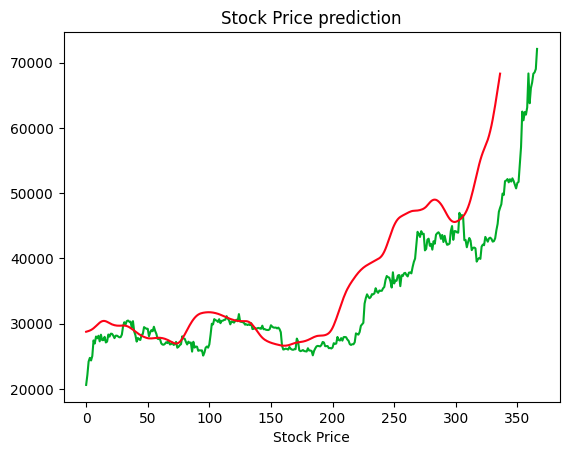

In [20]:
plt.plot(actual_stock_price , color = "#00AC28" , label = "Actual Stock Price") 
plt.plot(predicted_price , color = "#FC0317" , label = "Predicted Stock Price")
plt.title("Stock Price prediction")
plt.xlabel("Time")
plt.xlabel("Stock Price")